
Filas tras limpieza: 187

PAÍSES EXCLUIDOS POR CUANTILES (1%–97%) Y MOTIVO
- India
  • Population 2025: 1.46387e+09 > 1.77172e+08
  • Land Area (Km²): 2.97319e+06 > 2.74615e+06
- China
  • Population 2025: 1.4161e+09 > 1.77172e+08
  • Land Area (Km²): 9.38821e+06 > 2.74615e+06
- United States
  • Population 2025: 3.47276e+08 > 1.77172e+08
  • Land Area (Km²): 9.14742e+06 > 2.74615e+06
- Indonesia
  • Population 2025: 2.85721e+08 > 1.77172e+08
- Pakistan
  • Population 2025: 2.5522e+08 > 1.77172e+08
- Nigeria
  • Population 2025: 2.37528e+08 > 1.77172e+08
- Brazil
  • Population 2025: 2.12812e+08 > 1.77172e+08
  • Land Area (Km²): 8.35814e+06 > 2.74615e+06
- Russia
  • Land Area (Km²): 1.63769e+07 > 2.74615e+06
- Japan
  • Median Age: 49.8 > 47.432
- DR Congo
  • Fert. Rate: 5.9 > 4.6812
- Italy
  • Median Age: 48.2 > 47.432
- South Korea
  • Fert. Rate: 0.75 < 0.7756
- Argentina
  • Urban Pop: 0.96 > 0.9504
- Canada
  • Land Area (Km²): 9.09351e+06 > 2.74615e+06
- Angola
  • Fert. Rat

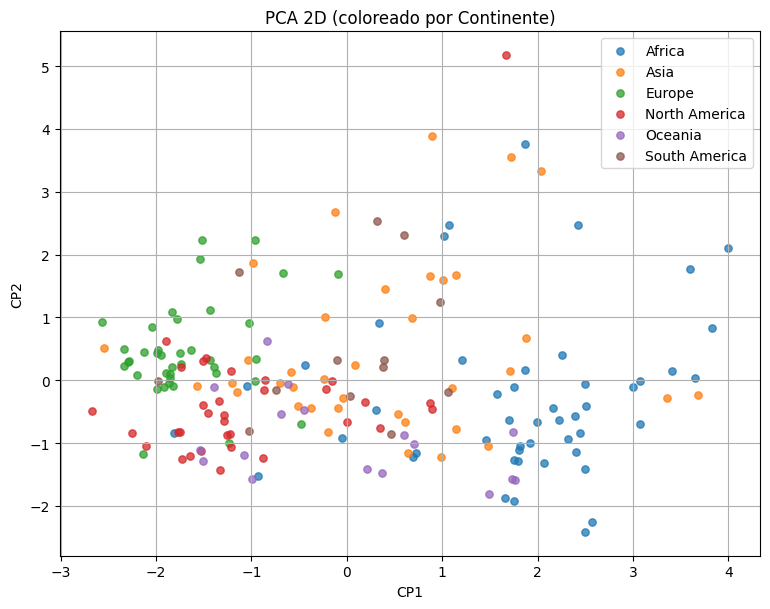


K-MEANS SOBRE PCA 2D NORMALIZADA | k = 2
México -> Cluster 0

Tabla de contingencia (Cluster vs Continente):
Continent  Africa  Asia  Europe  North America  Oceania  South America
Cluster                                                               
0              21    15       5              1        0              4
1              27    22      34             32       17              9

Cramér's V (asociación Cluster–Continente): 0.4109  |  Purity: 0.2941
Interpretación de V: 0=independencia, 1=asociación perfecta (no implica causalidad).

Países por cluster:
  Cluster 0: Bangladesh, Ethiopia, Mexico, Egypt, Philippines, Vietnam, Iran, Turkey, Germany, Thailand
  Cluster 1: Poland, Nepal, Venezuela, North Korea, Burkina Faso, Sri Lanka, Taiwan, Malawi, Senegal, Romania

Promedios por cluster (variables originales):
 Cluster  Population 2025  Yearly Change  Density (P/Km²)  Land Area (Km²)  Fert. Rate  Median Age  Urban Pop
       0    51856559.0435         0.0157         115.7391 

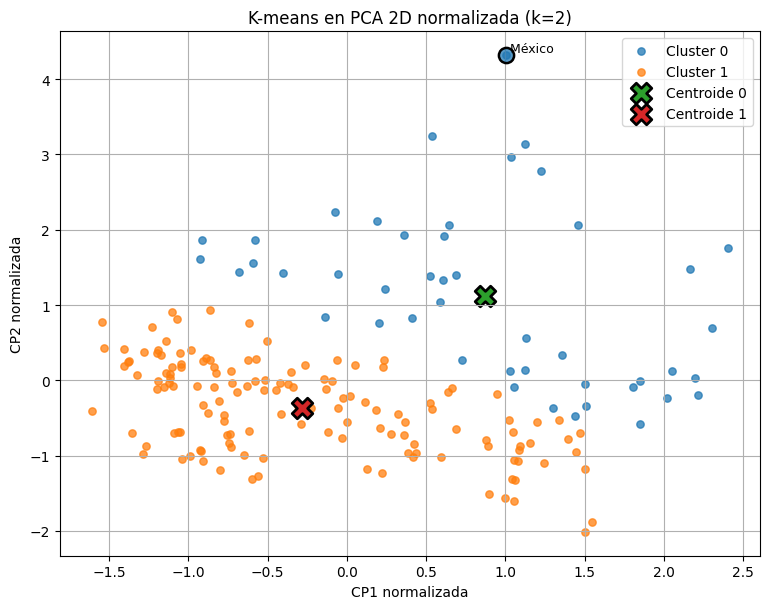


K-MEANS SOBRE PCA 2D NORMALIZADA | k = 3
México -> Cluster 0

Tabla de contingencia (Cluster vs Continente):
Continent  Africa  Asia  Europe  North America  Oceania  South America
Cluster                                                               
0               7    10       5              1        0              4
1              36    11       0              3        8              2
2               5    16      34             29        9              7

Cramér's V (asociación Cluster–Continente): 0.4981  |  Purity: 0.4278
Interpretación de V: 0=independencia, 1=asociación perfecta (no implica causalidad).

Países por cluster:
  Cluster 0: Bangladesh, Ethiopia, Mexico, Egypt, Philippines, Vietnam, Iran, Turkey, Germany, Thailand
  Cluster 1: Tanzania, Kenya, Uganda, Iraq, Afghanistan, Yemen, Uzbekistan, Mozambique, Ghana, Madagascar
  Cluster 2: Poland, Malaysia, Nepal, Venezuela, North Korea, Sri Lanka, Taiwan, Romania, Netherlands, Ecuador

Promedios por cluster (variables ori

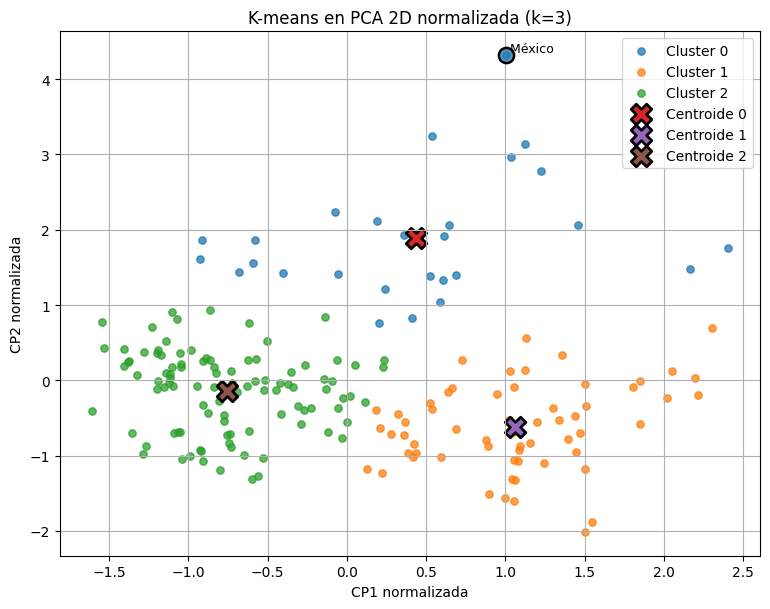


K-MEANS SOBRE PCA 2D NORMALIZADA | k = 4
México -> Cluster 1

Tabla de contingencia (Cluster vs Continente):
Continent  Africa  Asia  Europe  North America  Oceania  South America
Cluster                                                               
0               6    13       4             24       10              7
1               6     9       2              1        0              3
2              35    10       0              2        6              1
3               1     5      33              6        1              2

Cramér's V (asociación Cluster–Continente): 0.5430  |  Purity: 0.5401
Interpretación de V: 0=independencia, 1=asociación perfecta (no implica causalidad).

Países por cluster:
  Cluster 0: Nepal, Venezuela, Sri Lanka, Ecuador, Tunisia, Haiti, Jordan, Dominican Republic, United Arab Emirates, Azerbaijan
  Cluster 1: Bangladesh, Ethiopia, Mexico, Egypt, Philippines, Vietnam, Iran, Turkey, France, South Africa
  Cluster 2: Tanzania, Kenya, Uganda, Iraq, Afghanis

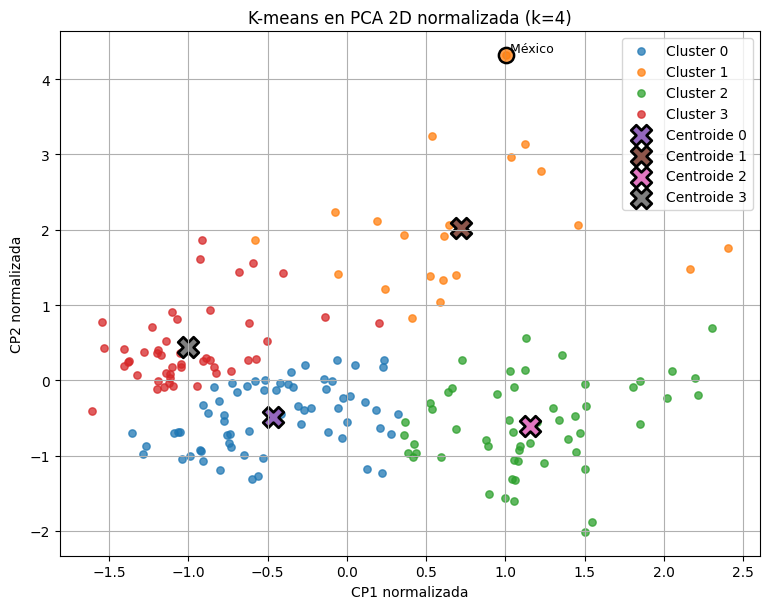

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7.8, 6.0)
plt.rcParams["axes.grid"] = True

# CSV y limpieza  
df = pd.read_csv("population_data.csv")
# Se quitan las columnas irrelevantes
df = df.drop(columns=["id"])
df = df.drop(columns=["World Share"])

# País
country_col = None
for c in df.columns:
    if "country" in c.lower():
        country_col = c
        break

# columnas
y = df["Continent"].astype(str).values
num_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
X = df[num_cols].astype(float).values

# 0.1) eliminar filas con NaN/Inf
m0 = np.all(np.isfinite(X), axis=1)
df0 = df.loc[m0].reset_index(drop=True)
X0 = X[m0]
y0 = y[m0]

# Outliers suaves por cuantiles 1%–97% y lista de países excluidos
q_low = np.quantile(X0, 0.01, axis=0)
q_hi  = np.quantile(X0, 0.97, axis=0)

excluded_by_row = {}
keep = np.ones(len(X0), dtype=bool)

# Países que quedan fuera de los cuantiles
for i in range(len(X0)):
    reasons = []
    for j, col in enumerate(num_cols):
        v = float(X0[i, j])
        lo = float(q_low[j])
        hi = float(q_hi[j])
        if v < lo:
            reasons.append(f"{col}: {v:.6g} < {lo:.6g}")
        elif v > hi:
            reasons.append(f"{col}: {v:.6g} > {hi:.6g}")
    if reasons:
        keep[i] = False
        if country_col is not None:
            cname = str(df0.loc[i, country_col])
        else:
            cname = f"row_{i}"
        excluded_by_row[cname] = reasons

df = df0.loc[keep].reset_index(drop=True)
X = X0[keep]
y = y0[keep]

print(f"\nFilas tras limpieza: {len(X)}")

print("\nPAÍSES EXCLUIDOS POR CUANTILES (1%–97%) Y MOTIVO")
if excluded_by_row:
    for cname, reasons in excluded_by_row.items():
        print(f"- {cname}")
        for r in reasons:
            print(f"  • {r}")
else:
    print("No se excluyeron filas por cuantiles.")

# Normalización z-score
mu = X.mean(axis=0)
sd = X.std(axis=0, ddof=1)
Z = (X - mu) / sd

# Prueba de Shapiro–Wilk (W)
def norm_ppf(p): # aproximación de Peter John Acklam
    a = [-3.969683028665376e+01,  2.209460984245205e+02, -2.759285104469687e+02,
          1.383577518672690e+02, -3.066479806614716e+01,  2.506628277459239e+00]
    b = [-5.447609879822406e+01,  1.615858368580409e+02, -1.556989798598866e+02,
          6.680131188771972e+01, -1.328068155288572e+01]
    c = [-7.784894002430293e-03, -3.223964580411365e-01, -2.400758277161838e+00,
         -2.549732539343734e+00,  4.374664141464968e+00,  2.938163982698783e+00]
    d = [ 7.784695709041462e-03,  3.224671290700398e-01,  2.445134137142996e+00,
          3.754408661907416e+00]
    plow = 0.02425
    phigh = 1 - plow
    if p <= 0.0: return -np.inf
    if p >= 1.0: return np.inf
    if p < plow:
        q = np.sqrt(-2*np.log(p))
        num = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5])
        den = ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        return num/den
    if p > phigh:
        q = np.sqrt(-2*np.log(1-p))
        num = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5])
        den = ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        return -(num/den)
    q = p - 0.5
    r = q*q
    num = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5]) * q
    den = (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1.0)
    return num/den

# Aproximación de W
def shapiro_w_approx(x):
    x = x[np.isfinite(x)].astype(float)
    n = len(x)
    if n < 3: return np.nan
    xs = np.sort(x)
    ssd = np.sum((xs - xs.mean())**2)
    if ssd <= 0: return np.nan
    m = np.array([norm_ppf((i - 0.375)/(n + 0.25)) for i in range(1, n+1)], dtype=float)
    a = m / np.sqrt(np.sum(m*m))
    s = np.sum(a * xs)
    return float((s*s) / ssd)

# Clasificación de W
def clasificar_w(W):
    if not np.isfinite(W): return "N/A"
    if W < 0.8: return "NO NORMAL"
    if W < 0.95: return "TENDENCIA A SER NORMAL"
    return "NORMAL"

w_rows = []
for j, col in enumerate(num_cols):
    Wv = shapiro_w_approx(Z[:, j])
    w_rows.append([col, Wv, clasificar_w(Wv)])

W_df = pd.DataFrame(w_rows, columns=["Variable (Z)", "W", "Clasificación"]).sort_values("W")
print("\n" + "="*92)
print("SHAPIRO–WILK (W) SOBRE VARIABLES NORMALIZADAS (Z-SCORE)")
print("Reglas: W < .8 -> NO NORMAL | .8 <= W < .95 -> TENDENCIA | W >= .95 -> NORMAL")
print("="*92)
print(W_df.to_string(index=False, formatters={"W": lambda v: f"{v:.6f}" if np.isfinite(v) else "NaN"}))


# PCA 2D "a mano" y cargas (qué representan los ejes)
C = (Z.T @ Z) / (len(Z) - 1)
eigvals, eigvecs = np.linalg.eig(C)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

W_pca = eigvecs[:, :2]   # (d x 2)
P = Z @ W_pca            # (n x 2)

var_exp = eigvals / np.sum(eigvals)

print("\n" + "="*92)
print("PCA 2D (sobre variables normalizadas)")
print("="*92)
print(f"Varianza explicada CP1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada CP2: {var_exp[1]*100:.2f}%")

load_df = pd.DataFrame({
    "Variable": num_cols,
    "Carga_CP1": W_pca[:, 0],
    "Carga_CP2": W_pca[:, 1],
    "|CP1|": np.abs(W_pca[:, 0]),
    "|CP2|": np.abs(W_pca[:, 1]),
}).sort_values("|CP1|", ascending=False)

print("\nCARGAS (LOADINGS) -> interpretación del plano:")
print("CP1 = Σ (Carga_CP1_i * Z_i)   |   CP2 = Σ (Carga_CP2_i * Z_i)\n")
print(load_df[["Variable", "Carga_CP1", "Carga_CP2"]].to_string(
    index=False,
    formatters={"Carga_CP1": lambda v: f"{v:+.6f}", "Carga_CP2": lambda v: f"{v:+.6f}"}
))

# Gráfica de dispersión por la clase de la base, que es continente
plt.figure(figsize=(7.8, 6.2))
for lab in np.unique(y):
    m = (y == lab)
    plt.scatter(P[m, 0], P[m, 1], s=28, alpha=0.75, label=str(lab))
plt.title("PCA 2D (coloreado por Continente)")
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend()
plt.tight_layout()
plt.show()

# normalizar CP1/CP2 para k-means
D = np.column_stack((
    (P[:, 0] - P[:, 0].mean()) / P[:, 0].std(ddof=1),
    (P[:, 1] - P[:, 1].mean()) / P[:, 1].std(ddof=1)
))

# K-means y Cramér's V 
def dist(p, c): # Distancia Euclidiana
    return np.sqrt(np.sum((p - c)**2))

def init_centroids(data, k): # Inicialización aleatoria de centroides
    mn = data.min(axis=0)
    mx = data.max(axis=0)
    return [np.array([np.random.uniform(mn[0], mx[0]), np.random.uniform(mn[1], mx[1])]) for _ in range(k)]

def assign_labels(data, centroids): # Asignar etiquetas según centroides
    labels = np.empty(len(data), dtype=int)
    for i, p in enumerate(data):
        labels[i] = int(np.argmin([dist(p, c) for c in centroids]))
    return labels

def recompute_centroids(data, labels, k, prev): # Recalcular centroides
    out = []
    for i in range(k):
        pts = data[labels == i]
        out.append(pts.mean(axis=0) if len(pts) > 0 else prev[i].copy())
    return out

def kmeans(data, k, iters=40): # K-means completo
    centroids = init_centroids(data, k)
    prev = None
    for _ in range(iters):
        labels = assign_labels(data, centroids)
        if prev is not None and np.array_equal(labels, prev):
            break
        centroids = recompute_centroids(data, labels, k, centroids)
        prev = labels
    return np.array(centroids), labels

def contingency(labels, classes): # Tabla de contingencia
    return pd.crosstab(pd.Series(labels, name="Cluster"), pd.Series(classes, name="Continent"))

def cramers_v(tab): # Cramer para evaluar asociación entre continente y cluster
    obs = tab.values.astype(float)
    n = obs.sum()
    if n == 0:
        return np.nan
    row_sums = obs.sum(axis=1, keepdims=True)
    col_sums = obs.sum(axis=0, keepdims=True)
    exp = (row_sums @ col_sums) / n
    with np.errstate(divide="ignore", invalid="ignore"):
        chi2 = np.nansum((obs - exp)**2 / exp)
    r, c = obs.shape
    denom = n * max(1, min(r - 1, c - 1))
    return float(np.sqrt(chi2 / denom)) if denom > 0 else np.nan

def purity(tab): # Pureza del clustering
    a = tab.values.astype(float)
    return float(np.sum(np.max(a, axis=1)) / np.sum(a)) if np.sum(a) > 0 else np.nan

# Indice de México
mex_idx = None
if country_col is not None:
    s = df[country_col].astype(str).str.strip().str.lower()
    hits = np.where(s == "mexico")[0]
    if len(hits) == 0:
        hits = np.where(s.str.contains("mexico", na=False))[0]
    if len(hits) > 0:
        mex_idx = int(hits[0])

for k in [2, 3, 4]:
    centroids, labels = kmeans(D, k)
    tab = contingency(labels, y)
    V = cramers_v(tab)
    pur = purity(tab)

    print("\n" + "="*92)
    print(f"K-MEANS SOBRE PCA 2D NORMALIZADA | k = {k}")
    print("="*92)

    if mex_idx is not None:
        print(f"México -> Cluster {int(labels[mex_idx])}")
    else:
        print("México -> no encontrado (revisar nombre exacto en la columna país).")

    print("\nTabla de contingencia (Cluster vs Continente):")
    print(tab.to_string())

    print(f"\nCramér's V (asociación Cluster–Continente): {V:.4f}  |  Purity: {pur:.4f}")
    print("Interpretación de V: 0=independencia, 1=asociación perfecta (no implica causalidad).")

    # 10 países por cluster
    if country_col is not None:
        print("\nPaíses por cluster:")
        for i in range(k):
            idxs = np.where(labels == i)[0]
            sample = df.loc[idxs, country_col].astype(str).tolist()[:10]
            sample_txt = ", ".join(sample) if len(sample) > 0 else "(vacío)"
            print(f"  Cluster {i}: {sample_txt}")
    else:
        print("\nNo se detectó columna país; no se pueden listar países por cluster.")

    # promedios por cluster (variables originales, NO normalizadas)
    means = []
    for i in range(k):
        if np.sum(labels == i) == 0:
            means.append([np.nan]*len(num_cols))
        else:
            means.append(X[labels == i].mean(axis=0))
    mean_df = pd.DataFrame(means, columns=num_cols)
    mean_df.insert(0, "Cluster", list(range(k)))
    print("\nPromedios por cluster (variables originales):")
    print(mean_df.to_string(index=False, float_format=lambda v: f"{v:.4f}"))

    # gráfica por clusters + México del MISMO color del cluster
    plt.figure(figsize=(7.8, 6.2))
    cluster_colors = {}

    for i in range(k):
        m = (labels == i)
        sc = plt.scatter(D[m, 0], D[m, 1], s=28, alpha=0.75, label=f"Cluster {i}")
        fc = sc.get_facecolors()
        cluster_colors[i] = (fc[0].copy() if len(fc) > 0 else None)

    for i, c in enumerate(centroids):
        plt.scatter(c[0], c[1], s=220, marker="X", edgecolor="black", linewidth=2, label=f"Centroide {i}")

    if mex_idx is not None:
        mx, my = D[mex_idx, 0], D[mex_idx, 1]
        mex_cluster = int(labels[mex_idx])
        col = cluster_colors.get(mex_cluster, None)
        if col is None:
            plt.scatter(mx, my, s=120, edgecolor="black", linewidth=1.8, zorder=6)
        else:
            plt.scatter(mx, my, s=120, facecolor=col, edgecolor="black", linewidth=1.8, zorder=6)
        plt.text(mx, my, " México", fontsize=9, va="bottom", ha="left")

    plt.title(f"K-means en PCA 2D normalizada (k={k})")
    plt.xlabel("CP1 normalizada")
    plt.ylabel("CP2 normalizada")
    plt.legend()
    plt.tight_layout()
    plt.show()
